In [1]:
import chart_studio.plotly as py

In [2]:
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
#import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("insurance.csv")

# Let's store the original dataframe in another variable.
original_df = df.copy()

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Determine the distribution of charge
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])



trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="Charges Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="Charges Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('Charge Distribution','Log Charge Distribution'),
                         print_grid=False)



fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [7]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

In [8]:
bmi = [df["bmi"].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

fig = ff.create_distplot(bmi, group_labels, colors=colors)
# Add title
fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')

iplot(fig, filename='Basic Distplot')

In [9]:
corr = df.corr()

hm = go.Heatmap(
    z=corr.values,
    x=corr.index.values.tolist(),
    y=corr.index.values.tolist()
)


data = [hm]
layout = go.Layout(title="Correlation Heatmap")

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

In [10]:
young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values

trace0 = go.Box(
    y=young_adults,
    name = 'Young Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=senior_adult,
    name = 'Senior Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y=elders,
    name = 'Elders',
    boxmean= True,
    marker = dict(
        color = 'rgb(247, 186, 166)',
    )
)




data = [trace0, trace1, trace2]

layout = go.Layout(title="Body Mass Index <br> by Age Category", xaxis=dict(title="Age Category", titlefont=dict(size=16)),
                  yaxis=dict(title="Body Mass Index", titlefont=dict(size=16)))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


moore_lm = ols("bmi ~ age_cat", data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Mon, 05 Dec 2022   Prob (F-statistic):            0.00268
Time:                        17:36:40   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [12]:
#import plotly.plotly as py
import plotly.graph_objs as go

ya_smoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "yes")].values
sa_smoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "yes")].values
e_smoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "yes")].values

# Non-Smokers
ya_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "no")].values
sa_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "no")].values
e_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "no")].values

x_data = ['Young A. Smoker', 'Young A. Non-Smoker',
          'Senior A. Smoker', 'Senior A. Non-Smoker',
          'Elder Smoker', 'Elder Non-Smoker',]

y0 = ya_smoker
y1 = ya_nonsmoker
y2 = sa_smoker
y3 = sa_nonsmoker
y4 = e_smoker
y5 = e_nonsmoker

y_data = [y0,y1,y2,y3,y4,y5]

colors = ['rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)']

traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Body Mass Index of Smokers Status by Age Category',
    xaxis=dict(
    title="Status",
    titlefont=dict(
    size=16)),
    yaxis=dict(
        title="Body Mass Index",
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        titlefont=dict(
        size=16)
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 243, 192)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [13]:
# Mean could be affected easily by outliers or extreme cases.
# Means
avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].mean()

# Median
med_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].median()

average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="Age Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [14]:
df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


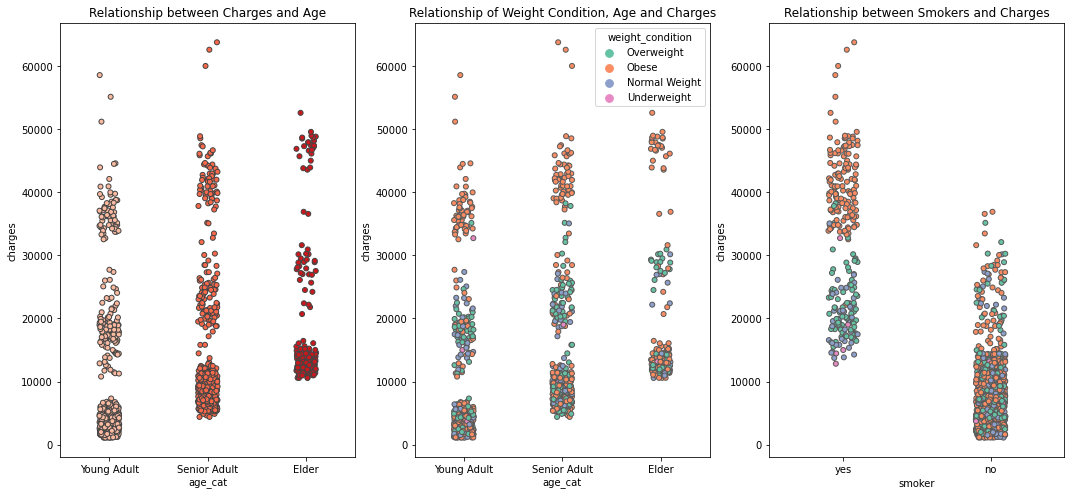

In [15]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

In [17]:
fig = ff.create_facet_grid(
    df,
    x='age',
    y='charges',
    color_name='weight_condition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Underweight': 'rgb(208, 246, 130)', 'Normal Weight': 'rgb(166, 246, 130)',
             'Overweight': 'rgb(251, 232, 238)', 'Obese': 'rgb(253, 45, 28)'}
)
251, 232, 238


fig['layout'].update(title="Weight Status vs Charges", width=800, height=600, plot_bgcolor='rgb(251, 251, 251)', 
                     paper_bgcolor='rgb(255, 255, 255)')


iplot(fig, filename='facet - custom colormap')

In [18]:
# First find the average or median of the charges obese people paid.

obese_avg = df["charges"].loc[df["weight_condition"] == "Obese"].mean()

df["charge_status"] = np.nan
lst = [df]


for col in lst:
    col.loc[col["charges"] > obese_avg, "charge_status"] = "Above Average"
    col.loc[col["charges"] < obese_avg, "charge_status"] = "Below Average"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average


Text(0.5, 1.0, 'Smokers')

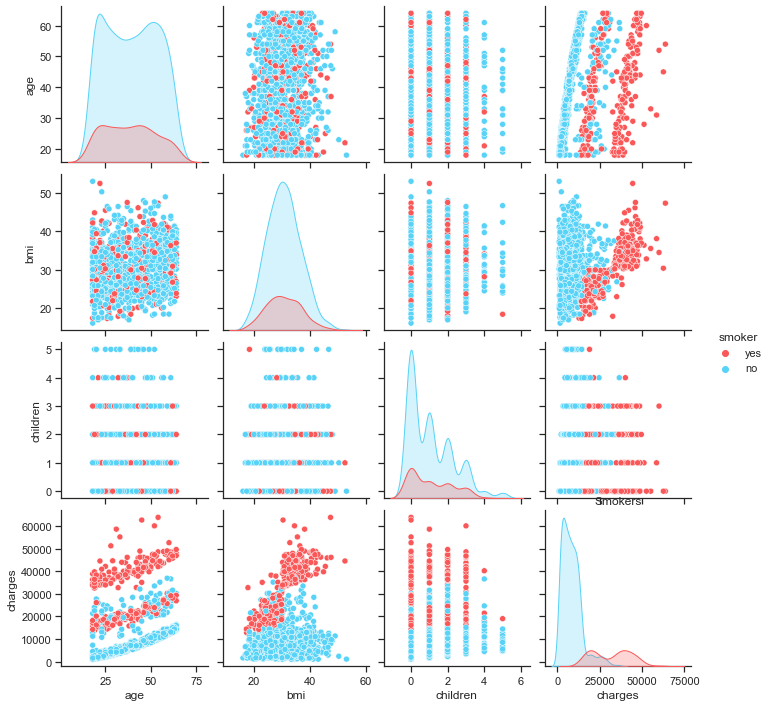

In [34]:
import seaborn as sns
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

In [20]:
# What Percentage of Obese that Smoked Paid aBove Average from the total obese patients?
# 79% of Obese were non-smokers while the 21% left were smokers
total_obese = len(df.loc[df["weight_condition"] == "Obese"])

obese_smoker_prop = len(df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")])/total_obese
obese_smoker_prop = round(obese_smoker_prop, 2)

obese_nonsmoker_prop = len(df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")])/total_obese
obese_nonsmoker_prop = round(obese_nonsmoker_prop, 2)


# Average charge by obese_smokers and obese_nonsmoker
charge_obese_smoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")].mean()
charge_obese_nonsmoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")].mean()

In [21]:

pointspossmoker = [-0.9,-1.1,-0.6,-0.3]
pointposnonsmoker = [0.45,0.55,1,0.4]
showLegend = [True,False,False,False]

data = []
for i in range(0,len(pd.unique(df['weight_condition']))):
    male = {
            "type": 'violin',
            "x": df['weight_condition'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Smoker',
            "scalegroup": 'Smoker',
            "name": 'Smoker',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "points": 'all',
            "pointpos": pointspossmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#DF0101'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#F78181'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(male)
    female = {
            "type": 'violin',
            "x": df['weight_condition'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Non-Smoker',
            "scalegroup": 'Non-Smoker',
            "name": 'Non-Smoker',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "points": 'all',
            "pointpos": pointposnonsmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#00FF40'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#81F781'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(female)
        

fig = {
    "data": data,
    "layout" : {
        "title": "Charges Distribution of Obese Patients<br><i>Group by Smoking Status",
        "yaxis": {
            "zeroline": False,
            "title": "Patient Charges",
            "titlefont": {
                "size": 16
            }
        },
        "violingap": 0,
        "violingroupgap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename='violin/advanced', validate = False)

In [37]:
# Hmmm we have to look closer into Obsese there is an obvious difference

chargedist_sm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")].values
chargedist_nsm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'Obese Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]


layout = dict(title="Deeper Look into Obese condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
              )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [22]:
# Create a Scatter Plot with all the Obese
obese_smoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")]
obese_nonsmoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")]


trace0 = go.Scatter(
    x = obese_smoker["age"].values,
    y = obese_smoker["charges"].values,
    name = 'Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#DF0101',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = obese_nonsmoker["age"].values,
    y = obese_nonsmoker["charges"].values,
    name = 'Non-Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#00FF40',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Clear Separation between Obese Smokers and Non-Smokers in Charges',
              yaxis = dict(zeroline = False,
                          title="Patient Charges",
                          titlefont=dict(size=16)),
              xaxis = dict(zeroline = False,
                          title="Age of the Patient",
                          titlefont=dict(
                          size=16))
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [23]:
# Cont table by weight condition and sex
df.head()

region_smoker = pd.crosstab(df['smoker'], df['region']).apply(lambda x: x/x.sum() * 100)
region_smoker

region,northeast,northwest,southeast,southwest
smoker,,,,
no,79.320988,82.153846,75.0,82.153846
yes,20.679012,17.846154,25.0,17.846154


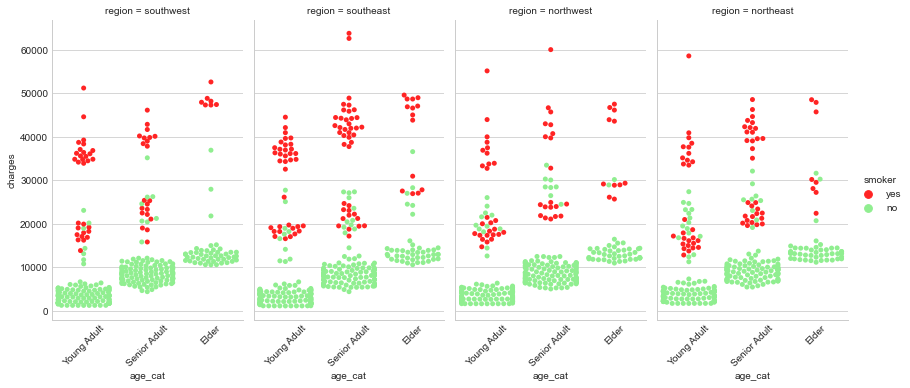

In [24]:
plt.style.use('seaborn-whitegrid')

ticks = df['age_cat'].unique()
colors = ['#ff2424', '#90ee90']


ax = sns.catplot(x="age_cat", y="charges", hue="smoker",
                 col="region", aspect=.6,
                 kind="swarm", palette=colors, data=df);

ax.set_xticklabels(labels = ticks, rotation=45)

plt.show()

In [26]:
# Obesity per region
region_weight = pd.crosstab(df['weight_condition'], df['region']).apply(lambda x: x/x.sum() * 100)
region_weight = round(region_weight, 2)
region_weight

region,northeast,northwest,southeast,southwest
weight_condition,,,,
Normal Weight,22.53,19.38,11.26,14.77
Obese,44.14,45.54,66.76,53.23
Overweight,30.25,32.92,21.98,31.08
Underweight,3.09,2.15,0.00,0.92


In [27]:
df.head()


# Average charge by Region
df["region"].unique()

# Median Charges per Region
southwest = np.median(df["charges"].loc[df["region"] == "southwest"].values)
southeast = np.median(df["charges"].loc[df["region"] == "southeast"].values)
northwest = np.median(df["charges"].loc[df["region"] == "northwest"].values)
northeast = np.median(df["charges"].loc[df["region"] == "northeast"].values)

lst = [southwest, southeast, northwest, northeast]

data = [go.Scatterpolar(
  r = [southwest, southeast, northwest, northeast],
  theta = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'],
  fill = 'toself'
)]

layout = go.Layout(
    title="Median Charged to Patients by Region",
    paper_bgcolor = "rgb(255, 255, 224)",
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, max(lst)]
    )
  ),
  showlegend = False
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "radar/basic")

<h4>Average Charge by Region depending on the Weight Condition: </h4>
<a id="charge_condition"></a>


In [28]:
# Weight Condition by Region Radar plots

df["weight_condition"].unique()

# Average charges for overweight patients by region 
sw_overweight = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Overweight")].values)
se_overweight = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Overweight")].values)
nw_overweight = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Overweight")].values)
ne_overweight = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Overweight")].values)

# Obese
sw_obese = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Obese")].values)
se_obese = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Obese")].values)
nw_obese = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Obese")].values)
ne_obese = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Obese")].values)

# Normal Weight
sw_nw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Normal Weight")].values)
se_nw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Normal Weight")].values)
nw_nw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Normal Weight")].values)
ne_nw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Normal Weight")].values)

# Underweight
sw_uw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Underweight")].values)
se_uw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Underweight")].values)
nw_uw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Underweight")].values)
ne_uw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Underweight")].values)

# Labels
weight_labels = df["weight_condition"].unique().tolist()

# List per weight condition
sw_weights = [sw_overweight, sw_obese, sw_nw, sw_uw]
se_weights = [se_overweight, se_overweight, se_nw, se_uw]
nw_weights = [nw_overweight, nw_overweight, nw_nw, nw_uw]
ne_weights = [ne_overweight, ne_overweight, ne_nw, ne_uw]

data = [
    go.Scatterpolar(
        mode="lines+markers",
        r = sw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthWest",
        line=dict(
            color="rgba(0, 128, 128, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 74, 147, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = se_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthEast",
        line=dict(
            color="rgba(255, 72, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(219, 0, 0, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar2"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = nw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthWest",
        line=dict(
            color="rgba(72, 255, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 147, 74, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar3"
    ),
       go.Scatterpolar(
        mode="lines+markers",
        r = ne_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthEast",
        line=dict(
            color="rgba(247, 133, 11, 0.95)"
        ),
        marker=dict(
            color="rgba(245, 168, 86, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar4"
    )
]

layout = go.Layout(
    title="Average Patient Charges <br> by Region <br>(Depending on the Patient's Weight Condition)",
    showlegend = False,
     paper_bgcolor = "rgb(252, 234, 161)",
    polar = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
    polar3 = dict(
      domain = dict(
       x = [0.54, 1],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
        polar4 = dict(
      domain = dict(
        x = [0.54, 1],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ))

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(height=800, width=800)
iplot(fig, filename='polar/directions')

Text(17, 40000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

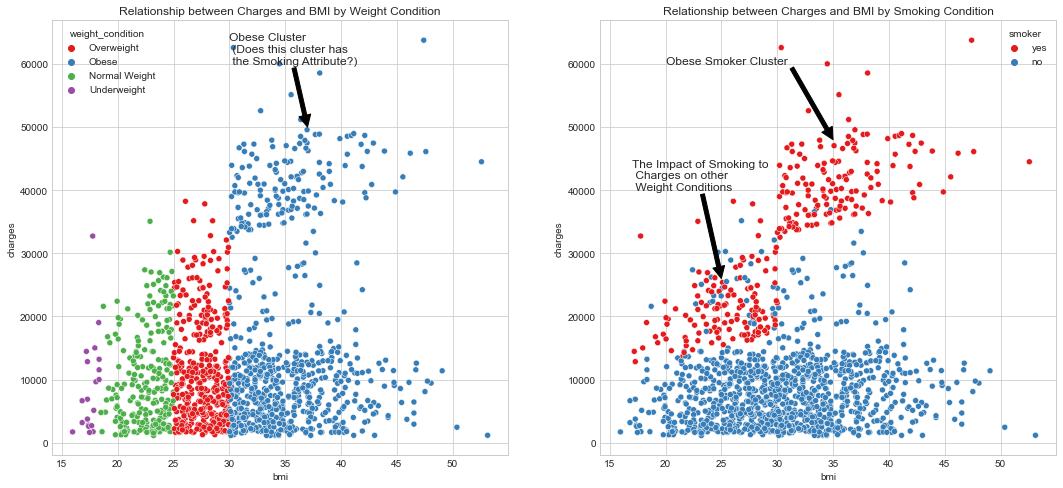

In [29]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

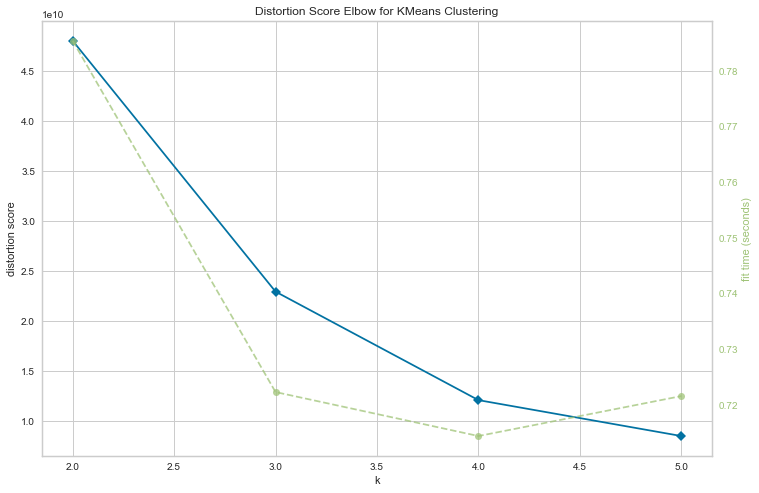

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
original_df.head()

X = df[["bmi", "charges"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

In [31]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(n_clusters=3)

In [32]:
# Printing the Centroids
print(kmeans.cluster_centers_)

[[3.04997317e+01 6.60918399e+03]
 [2.86664739e+01 1.96614470e+04]
 [3.50239172e+01 4.10979122e+04]]


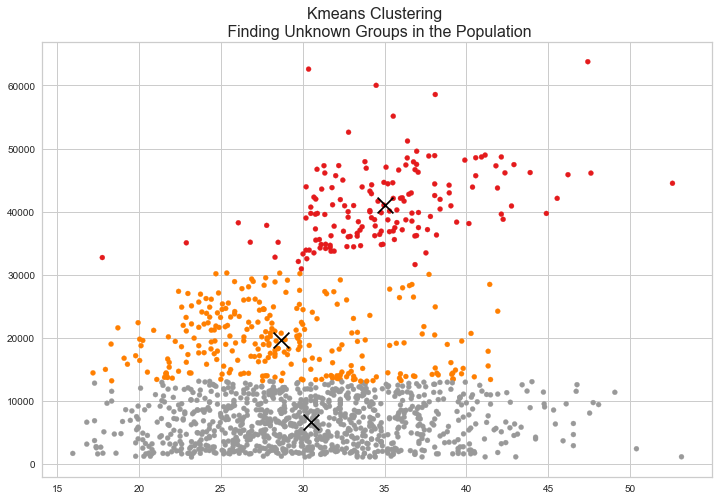

In [34]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()